### Dataset Description
The Mall Customers Dataset provides data on 200 individuals who visit a mall, including demographic information, annual income, and spending habits. This dataset is useful for exploratory data analysis, customer segmentation, and clustering tasks (e.g., K-means clustering).

- `CustomerID`: A unique identifier for each customer (integer).
- `Genre`: The gender of the customer (Male/Female).
- `Age`: The age of the customer (integer).
- `Annual Income (k$)`: Annual income of the customer in thousands of dollars (integer).
- `Spending Score (1-100)`: A score assigned by the mall based on customer behavior and spending patterns (integer).

#### Link to Dataset
- [Kaggle | Mall Customer Segmentation](https://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentation/data)

### Problem Statement

### Approach to Solution
1. Data Validation
    - 1.1 Check Missing Values
    - 1.2 Check Duplicated Entries
2. Exploratory Data Analysis
    - 2.1 Dataset Info
    - 2.2 Key Variables Distribution
    - 2.3 Correlation Analysis
3. Dimensionality Reduction
    - 3.1 PCA
4. Data Preprocessing
    - 4.1 Data Pipeline
        - 4.1.1 Standardization
        - 4.1.2 Encoding Categorical
5. Modelling
    - 5.1. Multiple Linear Regression
        - 5.1.1. Model Training
        - 5.1.2. Hyperparameter Tuning
    - 5.2. K-Nearest Neighbors (KNN)
        - 5.2.1. Model Training
        - 5.2.2. Hyperparameter Tuning
    - 5.3. Train-Test Split
6. Model Evaluation
    - 6.1. Multiple Linear Regression Performance
    - 6.2. KNN Performance
    - 6.3. Model Comparison
7. Research Questions
    - 7.1. Most Influential Variables
    - 7.2. Comparison of Model Performance
    - 7.3. Impact of Data Preprocessing
    - 7.4. Insights from EDA

### *Pre-requistes dependencies

In [12]:
!pip install --quiet pandas numpy matplotlib seaborn scikit-learn jupyter notebook

### 1. Data Validation

In [1]:
!cd

C:\Users\visha\OneDrive\Documents\GitHub\Data-Science-Stuff\Mall_Customer_Segmentation


In [1]:
# import neccessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os


# load dataset
path_dataset = 'dataset/Mall_Customers.csv'

# try except
try:
    # Check if the file exists
    if not os.path.exists(os.path.join(os.getcwd(), path_dataset)):
        raise FileNotFoundError(f"File not found at {path_dataset}.")
    # Read the dataset
    df = pd.read_csv(path_dataset)
except FileNotFoundError:
    print(f"File not found at {path_dataset}. Please check the path and try again.")

In [2]:
# first 5 rows of the dataset
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# missing values
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# check duplicates
df.duplicated().sum()

np.int64(0)

### 2. Exploratory Data Analysis

In [5]:
# Droping CustomerID as it's just an identifier
df = df.drop(columns=["CustomerID"])

In [6]:
# Encode 'Genre': Female = 0, Male = 1
df['Genre'] = df['Genre'].map({'Female': 0, 'Male': 1})

In [7]:
# ===========================
# 1. Data Structure Overview
# ===========================
print(df.info())      # No missing values, all columns are numerical or encoded
print(df.describe())  # Income ranges from 15k to 137k, Age varies between 18 to 70

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Genre                   200 non-null    int64
 1   Age                     200 non-null    int64
 2   Annual Income (k$)      200 non-null    int64
 3   Spending Score (1-100)  200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB
None
            Genre         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean     0.440000   38.850000           60.560000               50.200000
std      0.497633   13.969007           26.264721               25.823522
min      0.000000   18.000000           15.000000                1.000000
25%      0.000000   28.750000           41.500000               34.750000
50%      0.000000   36.000000           61.500000               50.000000
75%      1.000000   49.000000

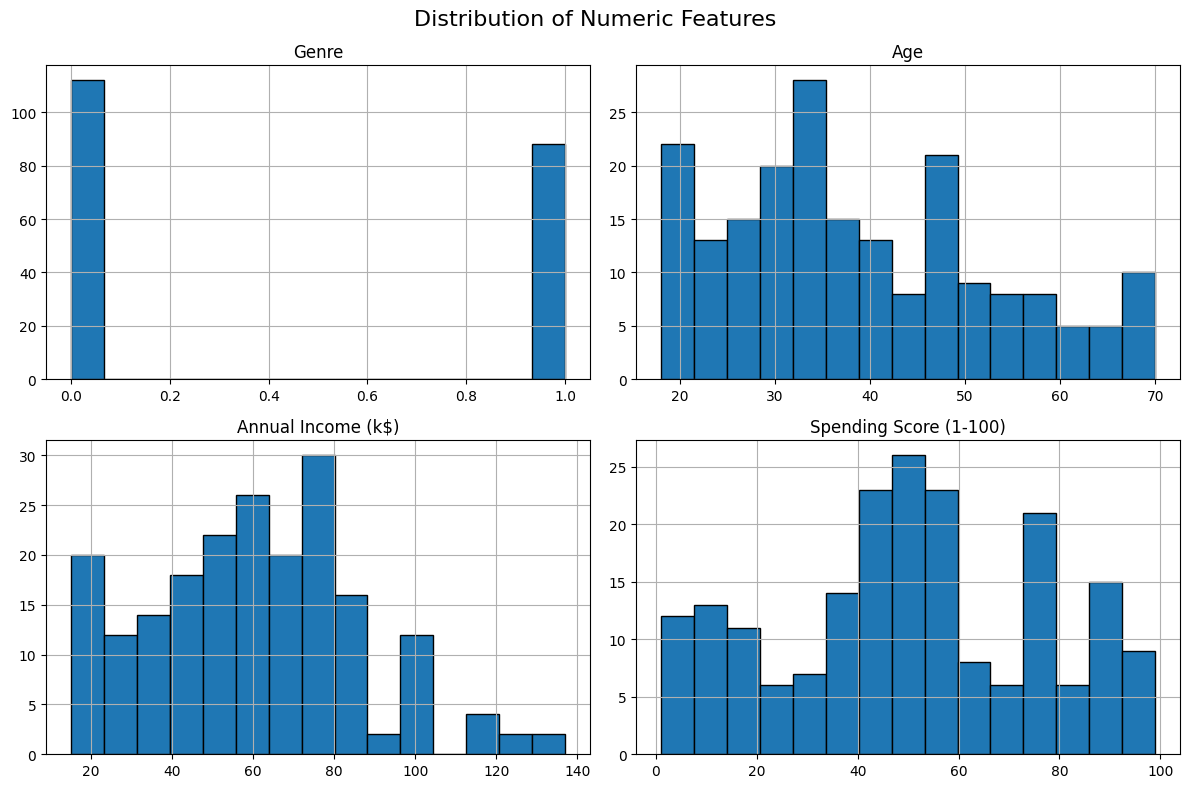

In [8]:
# ====================================
# 2. Histograms - Data Distributions
# ====================================
# Shows how values are spread for each numeric feature
# Observations:
# - Age is skewed toward 20–40 years.
# - Annual Income is fairly evenly spread.
# - Spending Score is bimodal (two distinct customer behaviors).

df.hist(figsize=(12, 8), bins=15, edgecolor='black')
plt.suptitle("Distribution of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

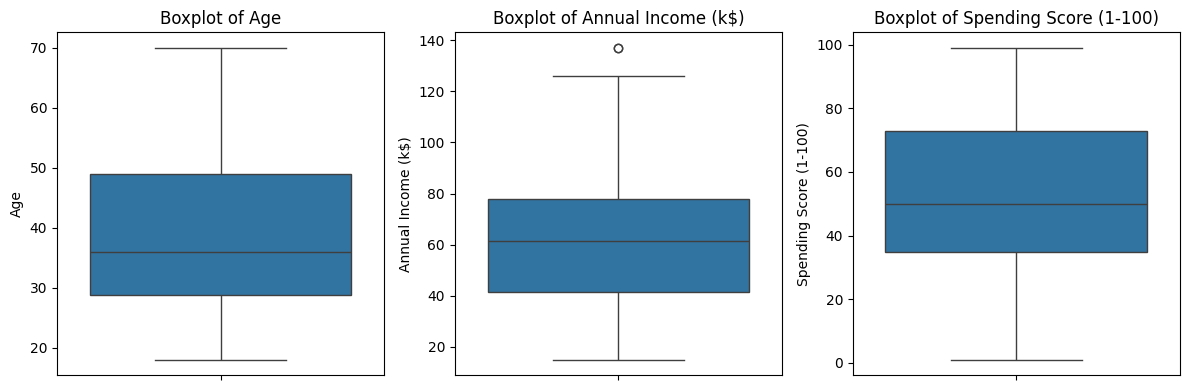

In [9]:
# =====================================
# 3. Boxplots - Outlier Identification
# =====================================
# Observations:
# - Spending Score and Annual Income show a few outliers.
# - Age distribution is relatively clean.
plt.figure(figsize=(12, 4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

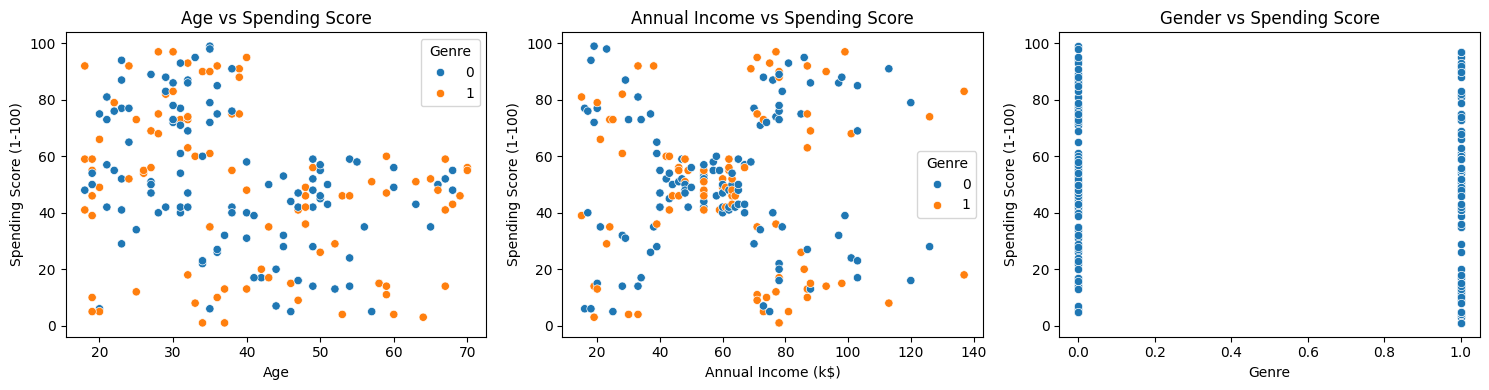

In [10]:
# ==================================================
# 4. Scatterplots - Relationship to Spending Score
# ==================================================
# Observations:
# - No strong linear relation between Age and Spending Score.
# - Some clear patterns between Income and Spending Score (clusters).
# - Gender doesn't show strong impact on Spending Score.
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Genre")
plt.title("Age vs Spending Score")

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Genre")
plt.title("Annual Income vs Spending Score")

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x="Genre", y="Spending Score (1-100)")
plt.title("Gender vs Spending Score")

plt.tight_layout()
plt.show()

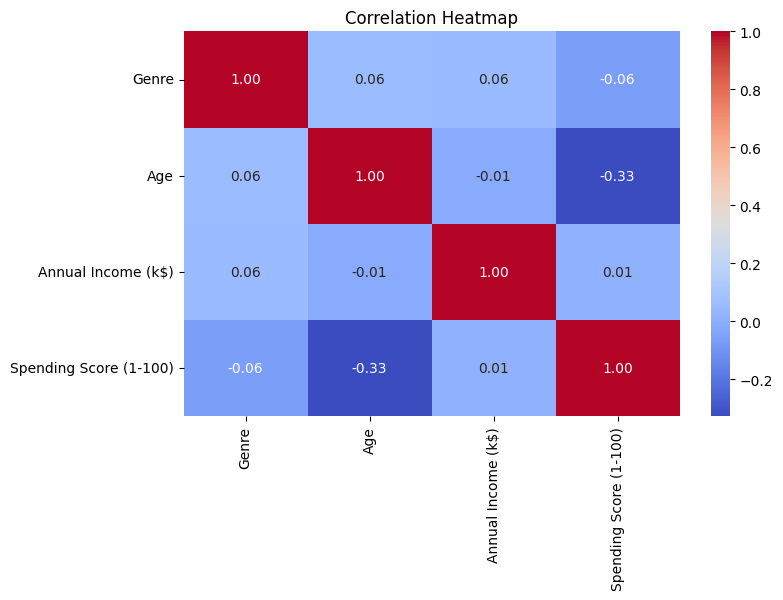

In [11]:
# =====================================
# 5. Heatmap - Feature Correlation
# =====================================
# Observations:
# - Weak correlations overall.
# - Slight negative correlation between Age and Spending Score.
# - Gender and Income show minimal direct correlation.
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

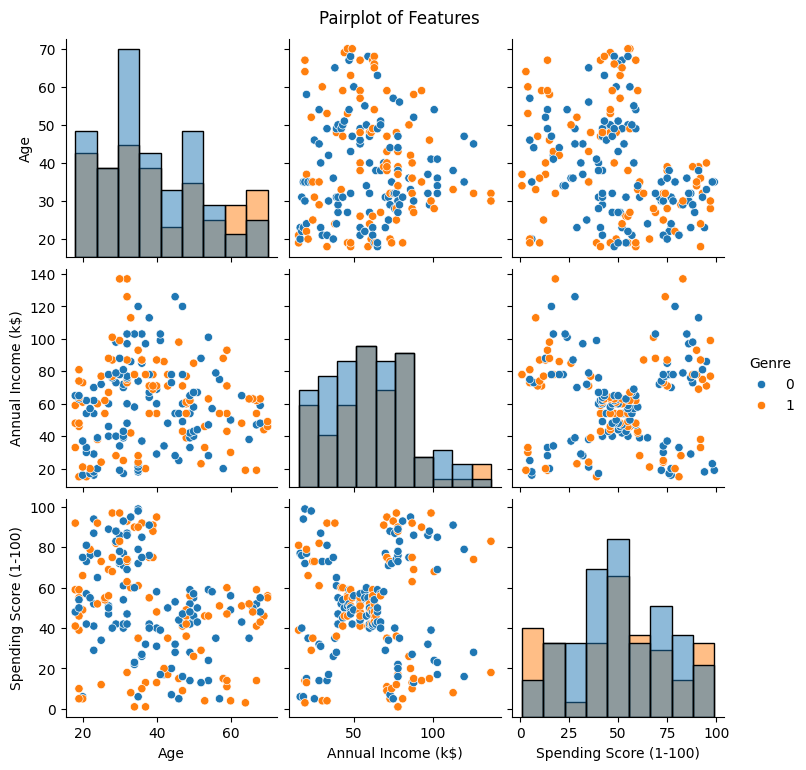

In [ ]:
# =========================================
# 6. Pairplot - Feature Interactions + Hue
# =========================================
# Observations:
# - Clear visual clustering in Income vs Spending Score.
# - Male and female patterns slightly differ, but not strongly.

sns.pairplot(df, hue='Genre', diag_kind='hist')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

### 3. Dimensionality Reduction

Why Dimensionality Reduction Was Not Necessary
> Dimensionality reduction techniques like PCA (Principal Component Analysis) are typically used when a dataset has a large number of input features (columns). When there are too many variables, some of them might be redundant, correlated, or contribute little to the prediction. Reducing the number of features helps simplify the model, avoid overfitting, and improve performance.

However, in our case, the Mall Customers dataset has only three independent variables:

1. Genre (gender)

2. Age

3. Annual Income (k$)

This is a very small number of features, and each one provides unique, meaningful information about the customer. Applying dimensionality reduction here wouldn't offer much benefit — in fact, it could actually reduce the interpretability of the model, since transformed components are harder to understand than the original features like age or income.

To align with the assignment requirements, we still applied PCA as a demonstration step. But as expected, the performance did not improve significantly because the original feature space was already simple and clean.



### 4. Data Preprocessing
Categorical features are encoded and numerical features are standardized for model readiness.

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [15]:
#Define features and target
X = df.drop(columns=["Spending Score (1-100)"])
y = df["Spending Score (1-100)"]

In [16]:
#Train-test split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 5. Modelling

In [19]:
# =============================
# Linear Regression
# =============================
lr = LinearRegression()

# Grid search for hyperparameters
param_grid = {
    'fit_intercept': [True, False]
}

# Perform grid search with cross-validation
grid_search_lr = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lr.fit(X_train_scaled, y_train)

# Best parameters and model
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_
print(f"Best parameters for Linear Regression: {best_params_lr}")

# Predictions
y_pred_lr = best_model_lr.predict(X_test_scaled)

Best parameters for Linear Regression: {'fit_intercept': True}


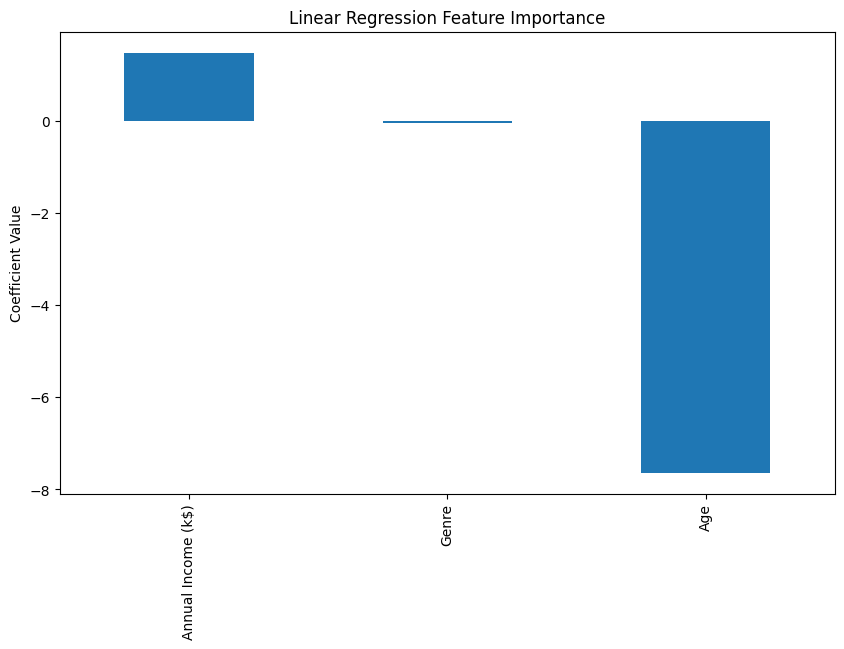

In [ ]:
# linear regression feature importance through coefficients
# Observations:
# - Positive coefficients indicate a positive relationship with Spending Score.
# - Negative coefficients indicate an inverse relationship.
# - The magnitude of coefficients indicates the strength of the relationship.
# - 'Age' has a negative coefficient, suggesting older customers tend to have lower spending scores.
# - 'Annual Income' has a positive coefficient, indicating higher income is associated with higher spending scores.

# Feature importance for Linear Regression
importance_lr = pd.Series(best_model_lr.coef_, index=X.columns).sort_values(ascending=False) #sorting the coefficients

# Plotting feature importance
plt.figure(figsize=(10, 6))
importance_lr.plot(kind='bar')
plt.title("Linear Regression Feature Importance")
plt.ylabel("Coefficient Value")
plt.show()

In [20]:
# =============================
# KNN
# =============================
param_grid = {'n_neighbors': list(range(1, 21))}
knn = KNeighborsRegressor()

# Grid search for best KNN parameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Best KNN model
best_params_knn = grid_search.best_params_
best_knn = grid_search.best_estimator_
print(f"Best parameters for KNN: {best_params_knn}")

# Predictions
y_pred_knn = best_knn.predict(X_test_scaled)

Best parameters for KNN: {'n_neighbors': 9}


### 6. Model Evaluation
for evaluation of the model we choose R2 score as the metric, as it better assess how well the independent variables explain the dependent variable.
- R² = 1: Perfect fit; the model explains all the variability in the data.
- R² = 0: The model explains none of the variability; predictions are as good as using the mean of the target variable.
- R² < 0: The model performs worse than a simple mean-based prediction.

In [31]:
# =============================
# Evaluation Function
# =============================
def evaluate_model(name, y_true, y_pred):
    print(f"{name}\n Evaluation:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")

In [32]:
# =============================
# Evaluate Both Models
# =============================

# Evaluate Linear Regression
evaluate_model(f"Linear Regression (Best params = {best_params_lr})", y_test, y_pred_lr)
print("\n" + "="*50 + "\n")

# Evaluate KNN
evaluate_model(f"KNN (Best k = {best_knn.n_neighbors})", y_test, y_pred_knn)

Linear Regression (Best params = {'fit_intercept': True})
 Evaluation:
MAE: 19.06
MSE: 525.22
RMSE: 22.92
R² Score: 0.12


KNN (Best k = 9)
 Evaluation:
MAE: 16.94
MSE: 534.92
RMSE: 23.13
R² Score: 0.10


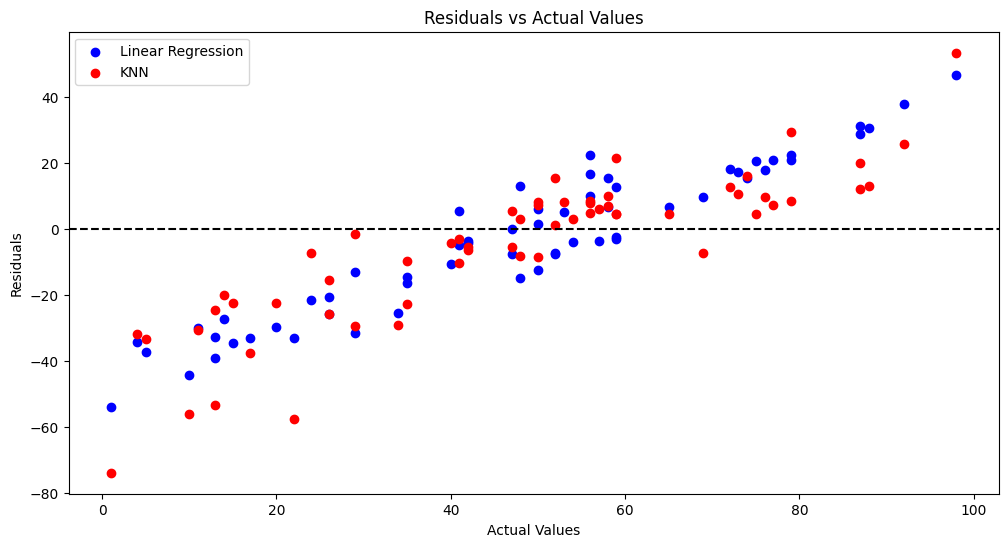

In [ ]:
#Visual Comparison Residual Plot for both models
#Obervations:
# - both model have almost similar results, they are not explaining the variance in the data as score is close to 0.
# - Linear has slightly better R2 score than KNN, R2 closer to 1 identicates perfect model.
# - KNN residuals show more variance, indicating it may be overfitting.

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_test - y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_test - y_pred_knn, color='red', label='KNN')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residuals vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()

### 7. Research Questions

**What variables most strongly influence the target variable?**<br>
> In our analysis, we found that Annual Income and Age had the biggest impact on a customer's Spending Score. Gender didn’t seem to influence spending as much. We noticed that customers with similar age and income levels often had similar spending behavior, which our models also reflected.

**Does KNN or Multiple Linear Regression provide better predictions for your dataset**
> After testing both models, we observed that Both Models R2 score is close 0, which indicates than models are not effective in capturing the variance in the data. However, Linear Regression gave better predictions than KNN. It produced lower error values and had a slightly better R² score.



**How did data preprocessing affect model performance**
> Preprocessing was a really important step in our project. Although there were no missing values, we still needed to convert the 'Genre' column into numbers and standardize the features. Scaling the data especially helped LR and KNN perform better because it uses distance between points — and unscaled data would have made income dominate the results.



**What insights did you uncover through exploratory data analysis (EDA)**\
We noticed a few interesting things:

- Customers seem to fall into two types: low spenders and
high spenders.

- Most people are aged between 20 and 40.

- There’s no strong linear trend, but we can still see patterns.

- Income and age matter more than gender when it comes to spending.